In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import glob
nombre_archivos=glob.glob("/home/rodolfo/Documentos/Analisis-Opinion-Publica-main/data/*.csv")

In [3]:
import unidecode
def quitar_acentos(texto):
    x = str(texto)
    x = unidecode.unidecode(x)
    return x
data=pd.concat(list(map(lambda x: pd.read_csv(x),nombre_archivos)))
data=data.reset_index()
data['review_español'] = data['review_español'].apply(quitar_acentos) 

Ahora vamos a empezar a modelar los datos

In [4]:
data.head()

,index,id,sentiment,review,review_español
0,0,6757_4,0,Odd slasher movie from Producer Charles Band. ...,Pelicula de Slasher Odd del productor Charles ...
1,1,11307_1,0,The Perfectly Stupid Weapon. I think the guys ...,El arma perfectamente estupida. Creo que los c...
2,2,9657_10,1,'Presque Rien' ('Come Undone') is an earlier w...,'Presque Rien' ('Ven a deshacer') es un trabaj...
3,3,7652_3,0,"In 1967, mine workers find the remnants of an ...","En 1967, los trabajadores de los mios encuentr..."
4,4,584_8,1,Excellent film dealing with the life of an old...,Excelente pelicula que lucha con la vida de un...


In [5]:
split = 0.85
d_train = data[:int(split*len(data))]
d_test = data[int((1-split)*len(data)):]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [7]:
features = vectorizer.fit_transform(d_train["review_español"])
test_features = vectorizer.transform(d_test["review_español"])
i = 45000
j = 10
words = vectorizer.get_feature_names()[i:i+10]
#pd.DataFrame(features[j:j+7,i:i+10].todense(), columns=words)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, d_train["sentiment"])
pred1 = model1.predict_proba(test_features)

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plt.plot(fpr, tpr, color, linewidth="3")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    if ann:
        plt.annotate("Acc: %0.2f" % acc, (0.2,0.7), size=14)
        plt.annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

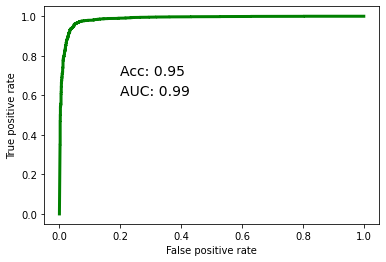

In [10]:
performance(d_test["sentiment"], pred1)

In [11]:
model1.predict(vectorizer.transform([quitar_acentos("feliz cumpleaños alfredo que sigas teniendo muchas bendiciones y exitos en tu vida, nada es imposible")]))

array([1])

In [12]:
model1.predict(vectorizer.transform([quitar_acentos("estúpido")]))

array([0])

In [13]:
for i in d_test[d_test["sentiment"]==0]["review_español"]:
    print(i)
    print("*"*100)

Vi la calificacion de 7.5 IMDB en esta pelicula y sobre la base de eso decidio ver esta pelicula que mi companero de cuarto habia alquilado. Ella dijo que lo habia visto antes. !Es divertido y triste! Llore la primera vez que lo vi, "ella brotaba. Tal vez comparado con otras peliculas de Bollywood, esto merece un 7.5 de 10, pero en comparacion con todas las demas peliculas que he visto en mi vida, esto no merece mas de un 3 . Cualquier pelicula donde pueda adivinar perpetuamente lo que va a pasar a continuacion, no es bueno para mi. Los personajes son increibles, como el acto no es realista en absoluto y se crean sus motivos. Es mas dramatico y las canciones no son todas Ese genial. Mi mayor problema con las peliculas de Bollywood es la falta de sutileza. Todas las emociones son demasiado exageradas y, por lo tanto, no es de todo realista. Cualquier emocion o vinculo entre los personajes que es lo menos sutil, debe magnificarse con una cancion innecesaria. yo Creo que entendi que la re

****************************************************************************************************
Esto se asigno a los fanaticos, ya que el \ Winner toma todo ", se produjo un coincidente entre dos" companias "separadas" (la Federacion de Lucha Mundial y la "Alianza": una amalgama de ex superestrellas de WCW y ECW. Porque el partido final Para Duduce, la compania superior era un partido de equipo de etiquetas, los luchadores estaban limitados a lanzar a los oponentes desde cada lado del anillo a otro; cada luchador concluye que para debilitar a sus oponentes e intensificar el partido, se necesita interferencia. Cada luchador Simplemente golpea a un oponente con golpes, ejecuta un movimiento especial y las etiquetas en un companero. La historia habia sido empanada previamente por el subterfugio de Vince de que un miembro del Allance seria fragil y se uniria a la WWF. Era obvio, con esa declaracion. , que prevaleceria el WWF. En general: la historia muy innovadora, pero la mala ejecuc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

